# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, recall_score, precision_score, f1_score, roc_curve, roc_auc_score 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('D:\Яндекс Практикум\Обучение с учителем/Churn.csv')

In [3]:
data.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Загрузил и открыл файл. Изучил первую информацию. Проверил таблицу на наличие дубликатов - дубликатов нет. В столбце 'Tenure' (сколько лет человек является клиентом банка) обнаружено более 9% пропусков. Это довольно много, чтобы ими пренебрегать.  Рассмотрим варианты их заполнения далее. Названия всех столбцов приводим к правильному виду.

In [8]:
data = data.rename(columns={'RowNumber': 'Row_Number',
    'CustomerId': 'Customer_Id',
    'CreditScore': 'Credit_Score',
    'NumOfProducts': 'Num_Of_Products',
    'HasCrCard': 'Has_Cr_Card',
    'IsActiveMember': 'Is_Active_Member',
    'EstimatedSalary': 'Estimated_Salary'                        
}) 

In [9]:
data.columns = data.columns.str.lower()

In [10]:
data.isnull().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [11]:
data_ten = data[data['tenure'].isnull()]
data_ten.head(20)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


In [12]:
data['tenure'].median()

5.0

In [13]:
data['tenure'] = data['tenure'].fillna(5.0)

Изучил по предоставленной ссылке на сайте kaggle.com строки с пропущенной информацией в столбце 'tenure', все данные там на месте и имеют разные значения, поэтому принял решение заполнить их медианным значением.

In [14]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
data['surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [16]:
data['surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: surname, Length: 2932, dtype: int64

In [17]:
data['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Изучил столбцы, содержащие текстовые значения. Столбец 'gender' имеет два уникальных значения, столбец 'geography' имеет три уникальных значения. Эти столбцы преобразуем методом прямого кодирования OHE. Чтобы тзбежать дамми-ловушку применим аргумент drop_first функции pd.get_dummies(). 

Столбец 'surname' содержит 2932 уникальных значения, это фамилии клиентов, для дальнейшей работы эти данные нам не нужны, поэтому этот столбец можно удалить из таблицы. Аналогично поступим и с столбцами 'row_number' и 'customer_id', информация в них для обучения модели нам не нужна.

In [18]:
data = data.drop(['row_number', 'customer_id', 'surname'], axis=1)

In [19]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [20]:
data.shape

(10000, 12)

**Вывод.** В целом данные в предоставленной таблице корректные, за исключением столбца 'tenure', в котором имелось 9% пропусков. Заполнили их медианным значением. Исправили названия столбцов. Преобразовали столбцы с текстовыми значениями методом прямого кодирования OHE. Удалили столбцы, которые нам не потребуются для дальнейшей работы. В результате подготовки данных мы получили таблицу с 12 столбцами и 10000 строк.

## Исследование задачи

### Деление данных на выборки

Разделим датафрейм на выборки. Целевой признак нам задан - факт ухода клиента (столбец 'exited'), остальные столбцы формируют переменную features - признаки.

Далее разделим данные на три выборки - обучающую, валидационную и тестовую в соотношении 3:1:1. Проверим правильность деления.

In [21]:
features = data.drop(['exited'], axis=1)
target = data['exited']

In [22]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345) 

In [23]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

In [24]:
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


### Масштабирование признаков

Так как все признаки имеют одинаковую важность - их необходимо масштабировать. Масштабирование численных признаков выполним методом стандартизации данных. 

Сохраним численные признаки в переменной numeric и зафиксируем их.

In [25]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary', 'num_of_products']

In [26]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

Масштабируем численные признаки обучающей, а затем и валидационной и тестовой выборки.

In [27]:
pd.options.mode.chained_assignment = None
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,0,0,1.524268,1,0,0


In [28]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
8532,-0.699824,-0.373192,-1.101690,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.737696,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.829679,0.438711,-0.891560,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.810266,1.239884,-0.891560,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.810266,-1.233163,0.830152,1,0,1.358533,0,1,1


In [29]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7041,-2.226392,-0.088482,-1.101690,-1.233163,0.830152,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.446272,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,-0.009707,0.722307,-0.891560,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.810266,-1.233163,0.830152,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.810266,0.615625,-0.891560,0,1,-1.070919,0,0,1


### Исследуем модели машинного обучения

Модель Дерево решений.

In [30]:
for depth in range(1, 8):
    model = model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid))
    print("F1:", f1_score(target_valid, predictions_valid))

max_depth = 1 : 0.791
F1: 0.0
max_depth = 2 : 0.824
F1: 0.5217391304347825
max_depth = 3 : 0.838
F1: 0.4234875444839857
max_depth = 4 : 0.852
F1: 0.5528700906344411
max_depth = 5 : 0.853
F1: 0.5406249999999999
max_depth = 6 : 0.858
F1: 0.5696969696969697
max_depth = 7 : 0.8505
F1: 0.5320813771517998


Максимальное значение accuracy - 0.858 и F1-меры - 0.5696969696969697 достигнуты при глубине дерева равном 6.

Модель Случайный лес.

In [31]:
best_model = None
best_est = 0
best_result = 0
for est in range(1, 80):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    predicted_valid = model.predict(features_valid)
    if result > best_result:
        best_est = est
        best_result = result
        best_predicted_valid = predicted_valid

print("Accuracy наилучшей модели на валидационной выборке:", best_result, 'при', best_est, 'деревьях в лесу')
print("F1-мера наилучшей модели:", f1_score(target_valid, best_predicted_valid))

Accuracy наилучшей модели на валидационной выборке: 0.8615 при 72 деревьях в лесу
F1-мера наилучшей модели: 0.5871833084947838


Метрика accuracy показала следующие значения: модель Дерево решений - 0.858, модель Случайный лес - 0.8615.

### Исследуем баланс классов

In [32]:
target_train.value_counts(normalize=1)

0    0.800667
1    0.199333
Name: exited, dtype: float64

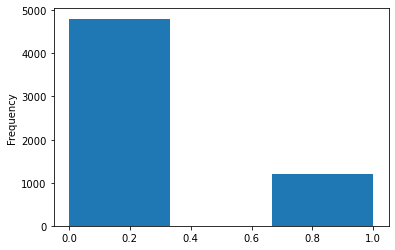

In [33]:
target_train.plot(kind='hist', bins=3);

Исследование показало, что класс "0" встречается ≈80% случаев, а "1" ≈20%. Налицо дисбаланс классов.

### Проверка моделей на адекватность

Проверим соотношение классов в каждой модели.

In [34]:
model_1 = DecisionTreeClassifier(random_state=12345)
model_1.fit(features_train, target_train)
predicted_valid_1 = pd.Series(model_1.predict(features_valid)).value_counts(normalize = 1)

model_2 = RandomForestClassifier(random_state=12345)
model_2.fit(features_train, target_train)
predicted_valid_2 = pd.Series(model_2.predict(features_valid)).value_counts(normalize = 1)

print('Доли классов в моделях -', 'Дерево решений:', predicted_valid_1, 'Случайный лес')

Доли классов в моделях - Дерево решений: 0    0.7955
1    0.2045
dtype: float64 Случайный лес


Наиболее точна оказалась модель Модель Дерево, затем модель Случайный лес.

Рассчитаем матрицу ошибок для каждой модели, а также полноту, точность, F1-меру и AUC-ROC, построим график ROC-кривой.

**Модель Дерево решений**

In [35]:
model_1 = DecisionTreeClassifier(max_depth=6, random_state=12345)
model_1.fit(features_train, target_train)
predicted_valid_1 = pd.Series(model_1.predict(features_valid))
confusion_matrix(target_valid, predicted_valid_1)

array([[1528,   54],
       [ 230,  188]], dtype=int64)

In [36]:
print("Полнота" , recall_score(target_valid, predicted_valid_1))
print("Точность", precision_score(target_valid, predicted_valid_1))
print("F1-мера", f1_score(target_valid, predicted_valid_1))

Полнота 0.44976076555023925
Точность 0.7768595041322314
F1-мера 0.5696969696969697


In [37]:
model_1_valid = model_1.predict_proba(features_valid)[:, 1]
auc_roc_1 = roc_auc_score(target_valid, model_1_valid)

auc_roc_1

0.8164631712023421

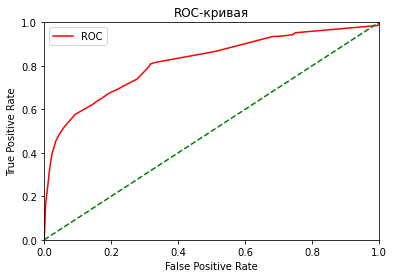

In [38]:
fpr, tpr, thresholds = roc_curve(target_valid, model_1_valid)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

Матрица ошибок Дерева решений склонна выдавать ложнонегативные предсказания. Полнота низкая, точность тоже невысокая, F1_мера тоже низкая.

**Модель Случайный лес**

In [39]:
model_2 = RandomForestClassifier(random_state=12345)
model_2.fit(features_train, target_train)
predicted_valid_2 = pd.Series(model_2.predict(features_valid))
confusion_matrix(target_valid, predicted_valid_2)

array([[1524,   58],
       [ 225,  193]], dtype=int64)

In [40]:
print("Полнота" , recall_score(target_valid, predicted_valid_2))
print("Точность", precision_score(target_valid, predicted_valid_2))
print("F1-мера", f1_score(target_valid, predicted_valid_2))

Полнота 0.46172248803827753
Точность 0.7689243027888446
F1-мера 0.5769805680119582


In [41]:
model_2_valid = model_2.predict_proba(features_valid)[:, 1]
auc_roc_2 = roc_auc_score(target_valid, model_2_valid)

auc_roc_2

0.840733672475638

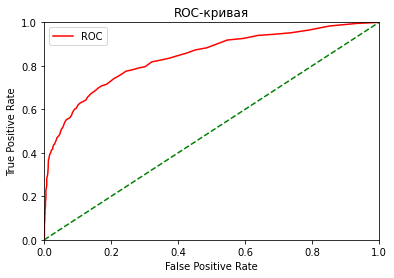

In [42]:
fpr, tpr, thresholds = roc_curve(target_valid, model_2_valid)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

Случайный лес показал почти такие же показания как и Дерево решений. Качество и точность низкие.

## Борьба с дисбалансом

### Преобразование выборки.
Так как положительных значений у нас приблизительно в 4 раза меньше отрицательных, для устранения дисбаланса нам нужно либо в 4  раза увеличить класс "1" или в 4 раза уменьшить класс "0".

Протестируем оба варианта.

Сначала применим технику downsampling - уменьшим выборку.

Для этого сделаем преобразование в несколько этапов:
- разделим обучающую выборку на отрицательные и положительные объекты;
- случайным образом отбросим часть из отрицательных объектов;
- с учётом полученных данных создадим новую обучающую выборку;
- перемешаем данные: положительные не должны идти следом за отрицательными - алгоритмам будет сложнее обучаться.

Напишем функцию, в которой разделим обучающую выборку на отрицательные и положительные объекты. С помощью операции downsampling уменьшим выборку, отбросив случайным образом три четверти отрицательных объектов. Перемешаем данные и создадим новую обучающую выборку.

In [43]:
def downsample(features, target, fraction):
    features_zeros = features_train[target == 0]
    features_ones = features_train[target == 1]
    target_zeros = target_train[target == 0]
    target_ones = target_train[target == 1]
    fraction = 0.25
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)


(2397, 11)
(2397,)


In [44]:
target_downsampled.value_counts(normalize=1)

0    0.501043
1    0.498957
Name: exited, dtype: float64

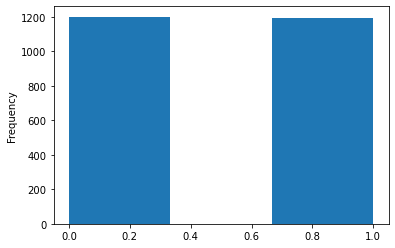

In [45]:
target_downsampled.plot(kind='hist', bins=3);

Теперь применим технику upsampling. 

Для этого сделаем преобразование в несколько этапов:

- разделим обучающую выборку на отрицательные и положительные объекты;
- скопируем несколько раз положительные объекты;
- с учётом полученных данных создадим новую обучающую выборку;
- перемешаем данные: идущие друг за другом одинаковые вопросы не помогут обучению.

Напишем функцию, в которой разделим обучающую выборку на отрицательные и положительные объекты. Продублируем объекты положительного класса и объедините их с объектами отрицательного класса с помощью функции pd.concat() и получим новую обучающую выборку. Перемешаем данные.

In [46]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    repeat = 4
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    return shuffle(features_upsampled, target_upsampled, random_state=12345) 

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)


(9588, 11)
(9588,)


In [47]:
target_upsampled.value_counts(normalize=1)

0    0.501043
1    0.498957
Name: exited, dtype: float64

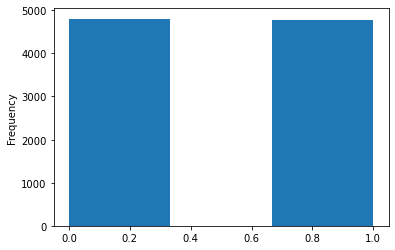

In [48]:
target_upsampled.plot(kind='hist', bins=3);

Видно, что оба метода создали выборки с одинаковой пропорцией классов. Классы имеют практически равные доли. Но так как увеличенная выборка содержит больше объектов, то для обучения модели лучше применить её.

### Обучение моделей на новых данных.

Дерево решений

In [49]:
model_1 = DecisionTreeClassifier(max_depth=6, random_state=12345)
model_1.fit(features_upsampled, target_upsampled)
predicted_valid_1 = model_1.predict(features_valid)

print("Полнота" , recall_score(target_valid, predicted_valid_1))
print("Точность", precision_score(target_valid, predicted_valid_1))
print("F1:", f1_score(target_valid, predicted_valid_1))

Полнота 0.7057416267942583
Точность 0.4616588419405321
F1: 0.5581835383159887


In [50]:
model_1_valid = model_1.predict_proba(features_valid)[:, 1]
auc_roc_1 = roc_auc_score(target_valid, model_1_valid)

auc_roc_1

0.7999473744699641

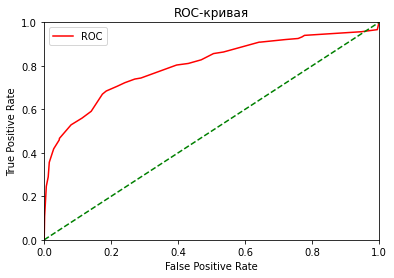

In [51]:
fpr, tpr, thresholds = roc_curve(target_valid, model_1_valid)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

Случайный лес

In [52]:
model_2 = RandomForestClassifier(random_state=12345)
model_2.fit(features_upsampled, target_upsampled)
predicted_valid_2 = model_2.predict(features_valid)

print("Полнота" , recall_score(target_valid, predicted_valid_2))
print("Точность", precision_score(target_valid, predicted_valid_2))
print("F1:", f1_score(target_valid, predicted_valid_2))

Полнота 0.5502392344497608
Точность 0.6804733727810651
F1: 0.6084656084656085


In [53]:
model_2_valid = model_2.predict_proba(features_valid)[:, 1]
auc_roc_2 = roc_auc_score(target_valid, model_2_valid)

auc_roc_2

0.8396471367477422

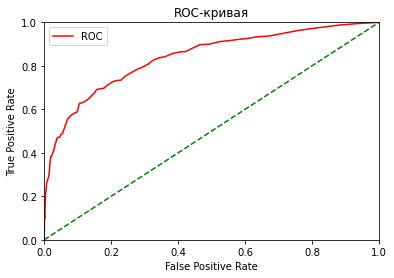

In [54]:
fpr, tpr, thresholds = roc_curve(target_valid, model_2_valid)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

На новой выборке модели показали увеличение полноты, уменьшение точности. F1-мера увеличилась в модели Случайный лес, в модели Дерево решений она немного уменьшилась.

Модель Случайный лес показала самый высокий показатель метрики F1-мера - 0.60, что выше заданного показателя.

AUC-ROC - площадь под ROC-кривой - самая большая тоже у модели Случайный лес - 0,84.

In [55]:
probabilities_valid = model.predict_proba(features_valid) # < напишите код здесь >
probabilities_one_valid = probabilities_valid[:, 1]

print(probabilities_one_valid[:5])

[0.02531646 0.3164557  0.26582278 0.06329114 0.03797468]


Дерево решений

In [56]:
model_1 = DecisionTreeClassifier(max_depth=6, random_state=12345)
model_1.fit(features_downsampled, target_downsampled)
predicted_valid_1 = model_1.predict(features_valid)

print("Полнота" , recall_score(target_valid, predicted_valid_1))
print("Точность", precision_score(target_valid, predicted_valid_1))
print("F1:", f1_score(target_valid, predicted_valid_1))

Полнота 0.7248803827751196
Точность 0.47641509433962265
F1: 0.5749525616698292


In [57]:
model_1_valid = model_1.predict_proba(features_valid)[:, 1]
auc_roc_1 = roc_auc_score(target_valid, model_1_valid)

auc_roc_1

0.8165720516093129

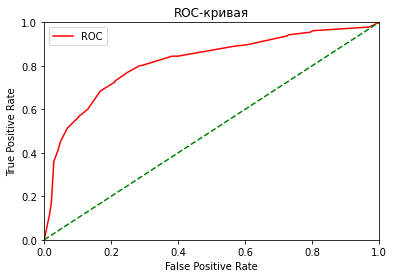

In [58]:
fpr, tpr, thresholds = roc_curve(target_valid, model_1_valid)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

Случайный лес

In [59]:
model_2 = RandomForestClassifier(random_state=12345)
model_2.fit(features_downsampled, target_downsampled)
predicted_valid_2 = model_2.predict(features_valid)

print("Полнота" , recall_score(target_valid, predicted_valid_2))
print("Точность", precision_score(target_valid, predicted_valid_2))
print("F1:", f1_score(target_valid, predicted_valid_2))

Полнота 0.7440191387559809
Точность 0.47192716236722304
F1: 0.5775301764159704


In [60]:
model_2_valid = model_2.predict_proba(features_valid)[:, 1]
auc_roc_2 = roc_auc_score(target_valid, model_2_valid)

auc_roc_2

0.8452907711757269

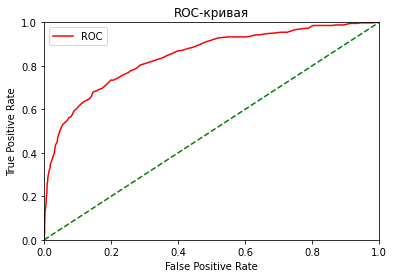

In [61]:
fpr, tpr, thresholds = roc_curve(target_valid, model_2_valid)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

Обучив модели на новых выборках, полученных техникой upsampling и downsampling, можно сравнить обученные модели.

Модель Дерево решений при downsampling-выборке показало значение F-меры выше, чем при upsampling-выборке - 0.5749525616698292 против 0.5581835383159887, также выше значение AUC-ROC - 0.7999473744699641 и 0.8165720516093129 соответственно.

Модель Случайный лес на увеличенной выборке показала значение F1-меры - 0.6084656084656085, AUC-ROC - 0.8396471367477422, а на уменьшенной выборке F1-мера - 0.5775301764159704, AUC-ROC - 0.8452907711757269.

Таким образом наилучшие показатели F1-меры показала модель Случайный лес, обученная на выборке, полученной по технике upsampling. Эту модель будем тестировать с помощью тестовой выборки.

## Тестирование модели

Для тестирования выбрали модель Случайный лес, так как у нее наилучшие показатели обучения.

In [62]:
model_4 = RandomForestClassifier(random_state=12345, n_estimators=25)
model_4.fit(features_upsampled, target_upsampled)
predicted_valid_4 = model_4.predict(features_test)
result = model.score(features_test, target_test)

print("Accuracy:", result)
print("Полнота:", recall_score(target_test, predicted_valid_4))
print("Точность:", precision_score(target_test, predicted_valid_4))
print("F1:", f1_score(target_test, predicted_valid_4))

Accuracy: 0.848
Полнота: 0.5650118203309693
Точность: 0.6602209944751382
F1: 0.6089171974522293


In [63]:
model_4_valid = model_4.predict_proba(features_valid)[:, 1]
auc_roc_4 = roc_auc_score(target_valid, model_4_valid)

auc_roc_4

0.8257202741366692

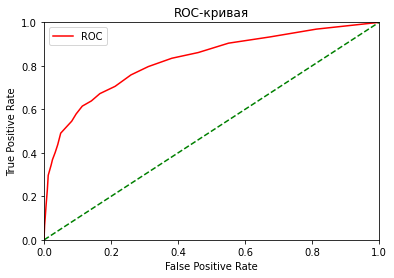

In [64]:
fpr, tpr, thresholds = roc_curve(target_valid, model_4_valid)
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

In [65]:
model = DummyClassifier(strategy='prior', random_state=12345)
model.fit(features_upsampled, target_upsampled)
result = model.score(features_test, target_test)
print('Accuracy проверочной модели:', result)    

Accuracy проверочной модели: 0.7885


Для проверки модели на адекватность использовал модель DummyClassifier. Accuracy проверочной модели меньше чем у выбранной нами модели Случайный лес. Значит наша модель прошла проверку на адекватность.

**Вывод** 

Изучив предоставленную таблицу, провели предобработку данных - привели название столбцов к аккуратному виду, заполнили пропуски. Столбцы содержащие текстовые значения преобразовали методом прямого кодирования OHE. Удалил столбцы, которые не нужны для обучения модели. 

Разделили данные на три выборки - обучающую, валидационную и тестовую. Масштабировали численные признаки трёх выборок. 

Провели исследование моделей машинного обучения. Так как в данных имелся сильный дисбалланс - примерно 80% отрицательных значений и 20% положительных значений, все модели показали низкие показатели точности, полноты и F1-меры, показывали большое количество ошибок.

Разобрали два варианта устранения дисбаланса - техники upsampling и downsampling. Оба варианта показали одинаковый результат - баланс классов стал иметь соотношение: "0" - 0.501043, "1" - 0.498957. 

Для получения новой обучающей выборки использовали операцию upsampling - увеличили в 4 раза класс "1" в обучающей выборке.

На новой обучающей выборке наилучшие значения показала модель Случайный лес - F1-мера - 0.608, AUC-ROC - 0.8396. Поэтому для проверки на тестовой выборке выбрали эту модель.

Модель прошла проверку на тестовой выборке и прошла проверку на адекватность.
- Accuracy: 0.791
- Полнота: 0.5650118203309693
- Точность: 0.6602209944751382
- F1: 0.6089171974522293
- AUC-ROC: 0.8257202741366692

Метрики качества модели F1-мера и ROC-AUC, хоть и работают по-разному и опираются на разные показатели, но междк ними прослеживается связь. Чем выше метрика F1-score, тем выше значение AUC-ROC.

Исходя из этого делаем вывод, что выбранная нами модель эффективна и адекватна.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*